# Data Generation

In [57]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [58]:
# 검증용은 valid_split 비율을 정했다면 요번에는 별도로 뽑아볼 것이다.학습용에서 검증용을 뽑을 것.

### mnist dataset 다운로드

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# 생성된 데이터 확인
print(f'학습용 X 데이터의 자료형 : \n{type(X_train)}')

print(f'학습용 Y 데이터의 모양 : \n{type(y_train)}')

print('*'*80)

print(f'학습용 X 데이터의 모양 : \n{X_train.shape}')

print('*'*80)

print(f'학습용 Y 데이터의 모양 : \n{y_train.shape}')

print(f'평가용 X 데이터의 모양 : \n{X_test.shape}')

학습용 X 데이터의 자료형 : 
<class 'numpy.ndarray'>
학습용 Y 데이터의 모양 : 
<class 'numpy.ndarray'>
********************************************************************************
학습용 X 데이터의 모양 : 
(60000, 28, 28)
********************************************************************************
학습용 Y 데이터의 모양 : 
(60000,)
평가용 X 데이터의 모양 : 
(10000, 28, 28)


## Data Pre-Processing

In [59]:
## 2차원 배열 --> 3차운 배열

'''
1. reshape((60000, 28, 28, 1)) 함수를 사용
2. 손글씨 이미지의 모양 변경 : 2차원(28, 28) --> 3차원(28, 28, 1)

'''

# 자연어할 때 LSTM(RNN)의 입력을 보면 데이터수는 batch_size를 줘야 결정이 되는데

# 32가 되던 64가 되던 채워지는거고 이제 나머지가 2차원으로 ...

# ( N, 476, 16 ) 이거에 비해서 4차원으로 들어간다...COnv2D의 형식자체가 공식문서 참조했을 때 4차원이다.

X_train = X_train.reshape((60000,28,28,1)) # 전체데이터의 수, 이미지 하나당 28,28 --> 28,28,1로 바꾼다

X_test = X_test.reshape((10000, 28, 28, 1)) # 차원 하나를 늘린다고 변하지 않는다, 일종의 트릭

# 결과 확인
print(f'차원 변환 후 학습용 데이터의 모양 : \n{X_train.shape}')

print('*'*80)

print(f'차원 변환 후 평가용 데이터의 모양 : \n{X_test.shape}')

차원 변환 후 학습용 데이터의 모양 : 
(60000, 28, 28, 1)
********************************************************************************
차원 변환 후 평가용 데이터의 모양 : 
(10000, 28, 28, 1)


In [60]:
### Scaling(normalizing) : 픽셀의 범위를 0과 1사이로 변환

# 넘파이 배열이어서 255로 나눠서 reshape.

X_train = X_train / 255
X_test = X_test / 255

# 결과 확인
print(f'학습용 X 데이터의 첫번째 이미지 픽셀의 최댓값 : {np.max(X_train[0, :, :, :])}, 최솟값 : {np.min(X_train[0, :, :, :])}')

print('*'*80)

print(f'평가용 X 데이터의 첫번째 이미지 픽셀의 최댓값 : {np.max(X_test[0,:,:,:])}, 최솟값 : {np.min(X_test[0, :, :, :])}')

# 검증용을 반드시 만들 필요는 없다.

# 전처리 끝.


학습용 X 데이터의 첫번째 이미지 픽셀의 최댓값 : 1.0, 최솟값 : 0.0
********************************************************************************
평가용 X 데이터의 첫번째 이미지 픽셀의 최댓값 : 1.0, 최솟값 : 0.0


## 학습용 / 검증용 데이터 생성

In [61]:
'''
1. train_test_split() 함수를 사용
2. 학습용 데이터의 일부를 검증용 데이터로 분할
'''

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, #validation_split=0.2 쓰면되는데.. 이렇게 쓰는 사람도 있다.
                 random_state=0)

# 결과 확인

print(f'학습용 X 데이터의 모양 : {X_train.shape}')

print('*'*80)

print(f'검증용 X 데이터의 모양 : {X_val.shape}')

학습용 X 데이터의 모양 : (48000, 28, 28, 1)
********************************************************************************
검증용 X 데이터의 모양 : (12000, 28, 28, 1)


## CNN Model Generation

In [62]:
### 모델 생성도 2가지 방법이 있음.
# 1. 사용자 정의 함수
    ### 모델 생성함수 정의

def create_model():
    # 모델 구조 정의하기
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
    # 첫번째 입력받는 Conv2D는 지정해서 오류를 내지않게 막아준다.
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    return model
    
    
# 1 모델 구조 정의
# 2 컴파일(compile) 어떤 손실함수로 최적화할거며.. 정해져야 한다

# 책에서는 Dense Layer를 두번 사용함. Dense Layer와 Dense Layer사이에 dropout을 넣는다. Dense layer를 여러번 쓸 경우..

In [63]:
### 모델의 구조 확인

# 모델 생성 함수 호출, 모델 생성

cnn = create_model()

# model.summary() 함수 사용

cnn.summary()

# 18496은 어떻게 나오느냐..

# 32*9+1*64=18496

# +1은 y절편. 289필터가 64개가 있다.. 가중치의 숫자가 18496.

# flatten -> Dense도 3136+1(절편)*10행 = 31370

# 시드 설정을 안해서 값은 개개인마다 다 다를 것이다.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [64]:
### 학습이 되지 않은 모델의 가중치 확인 --> 0에 가까운 실수
print(cnn.weights) #학습에 의해서 가중치가 변해간다..는걸 알면 된다.

[<tf.Variable 'conv2d_6/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.09211773,  0.06143355, -0.10780224,  0.01205668,
          -0.11701144,  0.07658383, -0.04211685,  0.04688239,
          -0.05205563, -0.0315888 , -0.05291905,  0.10702462,
           0.0510193 , -0.03379852,  0.05280359,  0.12097703,
          -0.04360003,  0.07652415,  0.10410239, -0.06846846,
           0.08342983, -0.11336391,  0.09569186,  0.11820902,
          -0.13408053, -0.10148846,  0.01986086, -0.08601522,
          -0.10631216, -0.0166886 , -0.08470874,  0.12205116]],

        [[ 0.07619339, -0.08048999,  0.07772912,  0.04942483,
           0.03570341,  0.0338092 , -0.12926438,  0.11919035,
          -0.03661171,  0.00287022, -0.05647516, -0.11264177,
          -0.02296881, -0.13279721, -0.12671617,  0.00643422,
          -0.02415747, -0.02488859, -0.09584174,  0.01021574,
          -0.08041453,  0.10464056,  0.08247356,  0.0975474 ,
           0.13221906,  0.05643182,  0.13616039,  0.1

# Model Learning

In [65]:
## model 컴파일(compile)
#- 개념 : 손실 함수 정의 + 최적화 함수 --> 모델 완성
#- 손실 함수 : 모델이 계산한 예측과 정답(label)을 비교하여 손실(loss)을 계산
#- 학습 : 경사하강법 --> 손실을 최소화하는 가중치 획득

#**손실 함수 외우자! ** 
#이진 분류(binary classification)
#tf.keras.losses.BinaryCrossentrypo
#model.compile(loss='binary_crossentropy')
#
#- 0일 확률이 30이고 1일 확률이 70이야
#
#다중분류(multi classification)
#1. tf.keras.losses.CategoricalCrossentropy() : 
#label --> One-Hot Encoding 
#model.compile(loss='categorical_crossentropy')
#
#2. tf.keras.losses.SparseCategoricalCrossentropy() :
#label --> 정수 인코딩
#model.compile(loss='sparse_categorical_crossentropy')

#최적화
#-최적화 함수
#1 tf.keras.optimizers.Adam(learning_rate)
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc]'))
#2 pdf참조


In [66]:
### 모델 컴파일 --> 손실 함수 정의 + 가중치 최적화 방식 + 검증용 데이터 평가 방식 --> 모델 완성
cnn.compile(loss='sparse_categorical_crossentropy', 
            optimizer='adam',
            metrics=['accuracy'])

In [67]:
### 모델 학습 --> LSTM과는 달리 학습의 결과물을 저장할 수 있음
history = cnn.fit(x=X_train,
                  y=y_train,
                  batch_size=64,
                  epochs=10, #학습횟수
                  validation_data=(X_val, y_val))#데이터를 직접 넣어줄 것이다.

# 과적합일어날 때 멈추고 싶을 때 callback을 하면됨. tf.keras.callbacks.EarlyStopping, patience 몇번까지 참아줄것인가, 이후 학습중지

# tf.keras.callback.modelCheckpoint 저장의 조건을 설정

Epoch 1/10
750/750 [==============================] - 17s 22ms/step - loss: 0.2244 - accuracy: 0.9322 - val_loss: 0.0734 - val_accuracy: 0.9778
Epoch 2/10
750/750 [==============================] - 14s 19ms/step - loss: 0.0678 - accuracy: 0.9795 - val_loss: 0.0526 - val_accuracy: 0.9836
Epoch 3/10
750/750 [==============================] - 15s 20ms/step - loss: 0.0491 - accuracy: 0.9851 - val_loss: 0.0524 - val_accuracy: 0.9835
Epoch 4/10
750/750 [==============================] - 17s 23ms/step - loss: 0.0398 - accuracy: 0.9881 - val_loss: 0.0420 - val_accuracy: 0.9858
Epoch 5/10
750/750 [==============================] - 16s 22ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0436 - val_accuracy: 0.9860
Epoch 6/10
750/750 [==============================] - 15s 20ms/step - loss: 0.0263 - accuracy: 0.9918 - val_loss: 0.0390 - val_accuracy: 0.9879
Epoch 7/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0365 - val_accuracy:

## 학습 결과 시각화(Visualization)

In [68]:
### 학습의 결과물 저장 변수 history 확인
print(history)
print('*'*80)
print(type(history.history))
print('*'*80)
print(history.history)
print('*'*80)


********************************************************************************
<class 'dict'>
********************************************************************************
{'loss': [0.22440111637115479, 0.06781534850597382, 0.04908421263098717, 0.03977375105023384, 0.03130761533975601, 0.026266176253557205, 0.02203316241502762, 0.017448442056775093, 0.014083816669881344, 0.012962421402335167], 'accuracy': [0.9321874976158142, 0.979479193687439, 0.9850624799728394, 0.9881041646003723, 0.9901041388511658, 0.991812527179718, 0.9930208325386047, 0.9947708249092102, 0.9954583048820496, 0.9956250190734863], 'val_loss': [0.07337409257888794, 0.05261418595910072, 0.052415601909160614, 0.042045578360557556, 0.04363219067454338, 0.03899756819009781, 0.03649667277932167, 0.03672201186418533, 0.04721355810761452, 0.04061156511306763], 'val_accuracy': [0.9777500033378601, 0.9835833311080933, 0.9835000038146973, 0.9858333468437195, 0.9860000014305115, 0.9879166483879089, 0.9890833497047424, 0.9

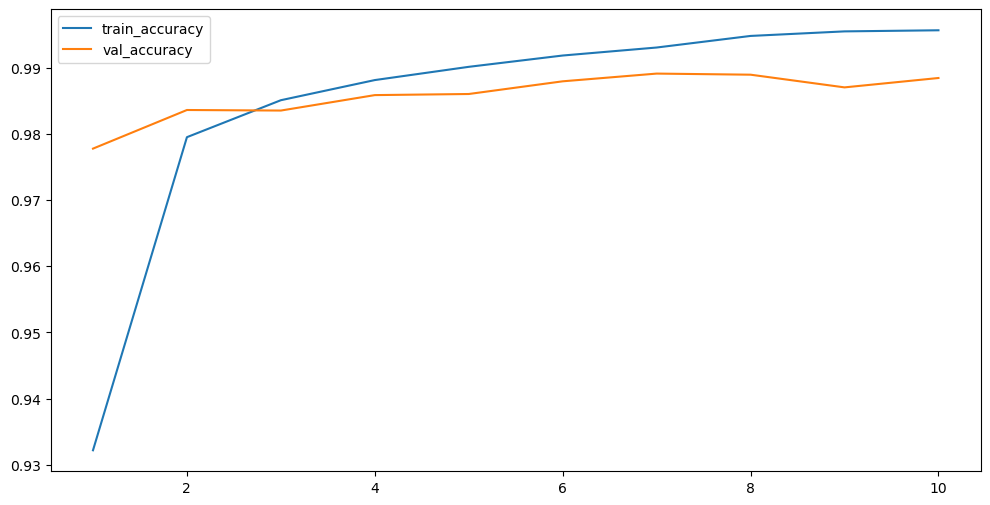

In [69]:
### 학습 결과 시각화(1) - loss

# plt 기본값 6.4 4.8

plt.figure(figsize=(12,6))
x = np.arange(1,11)
plt.plot(x, history.history['accuracy'], label='train_accuracy')
plt.plot(x, history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# 검증용 또는 평가용 기준으로.... train_loss val_loss로 바꿔서 해볼 것 

## 학습된 모델의 가중치 확인

In [72]:
print('학습된 모델의 가중치 확인')

print('*'*80)

print(cnn.weights)

학습된 모델의 가중치 확인
********************************************************************************
[<tf.Variable 'conv2d_6/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-2.45059013e-01,  1.22257814e-01, -2.79842287e-01,
           2.55252331e-01, -3.48465383e-01,  4.57084924e-02,
          -3.72345120e-01,  8.45055953e-02, -3.29564124e-01,
           5.72035201e-02, -3.47301811e-01,  3.15683067e-01,
           5.64153604e-02, -2.23022010e-02,  3.93753164e-02,
           2.15865240e-01,  1.57480806e-01,  1.50252998e-01,
           1.16593689e-01, -6.10186979e-02,  2.87458718e-01,
           2.00534519e-02,  3.17217499e-01,  2.22274110e-01,
          -2.58491129e-01, -8.79460480e-03,  5.91749512e-02,
           3.39708477e-02, -1.90563366e-01,  8.48576874e-02,
          -3.18815172e-01,  2.43406564e-01]],

        [[-2.03636855e-01, -7.58587718e-02,  1.66095957e-01,
           3.07078600e-01,  9.50818583e-02,  4.05918621e-02,
          -4.97609884e-01,  1.47377461e-01, -1.56

In [85]:
## 평가용 데이터에 대한 성능 평가
result = cnn.evaluate(X_test, y_test, batch_size=100)

# 결과 확인하기
print(f'평가용 데이터에 대한 성능 평가 : \n{result}')

100/100 [==============================] - 1s 9ms/step - loss: 0.0365 - accuracy: 0.9895
평가용 데이터에 대한 성능 평가 : 
[0.03645864874124527, 0.9894999861717224]


In [73]:
X_test.shape

(10000, 28, 28, 1)

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

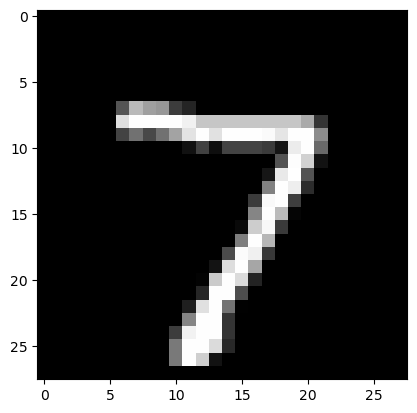

0번째 평가용 데이터의 레이블 : 
7


In [93]:
### 첫번째 평가용 데이터에 대한 예측

# 정답 확인
sample = X_test[0, :, :, :]
print(sample)
plt.imshow(sample, cmap='gray')
plt.show()
#원본 이미지를 볼 수 있는데,
print(f'0번째 평가용 데이터의 레이블 : \n{y_test[0]}')

print('*'*80)

# 예측 : model.predict()



# VGG16 모델을 이용한 이미지 분류 실습

In [ ]:
### VGG16 모델을 이용한 이미지 분류 실습
#
#모델소개
#1. 개요 : 옥스포드 대학의 연구팀 VGG에 의해 개발된 이미지 분류용 모델
#2. 구조 : Conv2D layer 13개 + MaxPooling2D layer 5개, Flatten layer 1개 + Dense layer 3개
#Maxpooling과 Flatten layer에는 가중치가 없으므로 앞뒤로 더해서 VGG16.

In [ ]:
#재구성 모델 생성
#- 모델 생성의 두번째 방법 : 입력 layer와 출력 layer를 지정해 줌으로써 모델을 만들 수 있음
#1) tf.keras.Model(inputs, outputs)
#2) 예시
#inputs = tf.keras.Input(shape=(3,))
#outputs = tf.keras.layers.Dense(4, activation='relu', activation='softmax')(inputs)
#model = tf.keras.Model(inputs=inputs, outputs=outputs)